### Student Information
Name: 黃子軍

Student ID: 110062143

GitHub ID: zijun0502

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [5]:
import sys
import os
# Add the 'helpers' directory to the Python path
notebook_dir = os.path.dirname(os.getcwd())
sys.path.append(notebook_dir)
import helpers.data_mining_helpers as dmh
import pandas as pd
import numpy as np

In [6]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# my functions
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [7]:
#Answer here
#Boolean access
fd = X[X['category'] == 1]
print(fd[:10])

print('-----------------')
#Attribute access
print(X.category)
print('-----------------')
#isin
print(X.isin([1,2,3][:10]))

                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1  comp.graphics
39  From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1  comp.graphics
42  From: gwang@magnus.acs.ohio-state.edu (Ge Wang...         1  comp.graphics
-----------------
0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Nam

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# Answer here

# isnull() document says: 
# Characters such as empty strings '' or numpy.inf 
# are not considered NA values 
# (unless you set pandas.options.mode.use_inf_as_na = True)

**My answer**:
Some characters and values will not be seen as a null value
in the method isnull() that pandas provide.
So in the above case, 
the string 'NaN' and 'None' is not recognized as null expectedly

In [11]:
X_sample = X.sample(n=1000,random_state=42) #random state

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
# Answer here
X[0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [13]:
X_sample[0:5]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


**My answer**: 
1. The order of the record has been randomized.
2. The size of the dataframe is shrinked to 1000

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


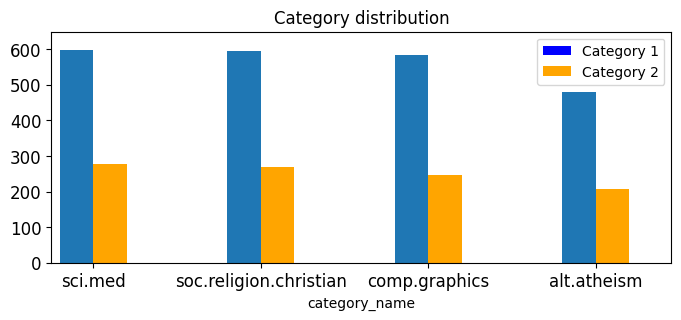

In [14]:
# Answer here
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# plot barchart for X_sample
fig, ax = plt.subplots()
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
upper_bound = max(X.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())
X.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           label = 'category 1', position = 1, width = 0.2)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           label = 'category 2', color = 'orange',
                                           position = 0, width = 0.2)
legend_elements = [
    Patch(facecolor='blue', label='Category 1'),
    Patch(facecolor='orange', label='Category 2')
]
ax.legend(handles=legend_elements)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [16]:
print(X_counts[4,0:100] == 1)

  (0, 0)	True
  (0, 37)	True


In [17]:
# Answer here
count_vect.get_feature_names_out()[37]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_00,term_000,term_008561,term_01,term_0100,term_013657,term_02,term_020,term_0200,term_02115,...,term_0358,term_04,term_040,term_05,term_0510,term_06,term_07,term_071,term_08,term_081052
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
doc_4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
doc_11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_21,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


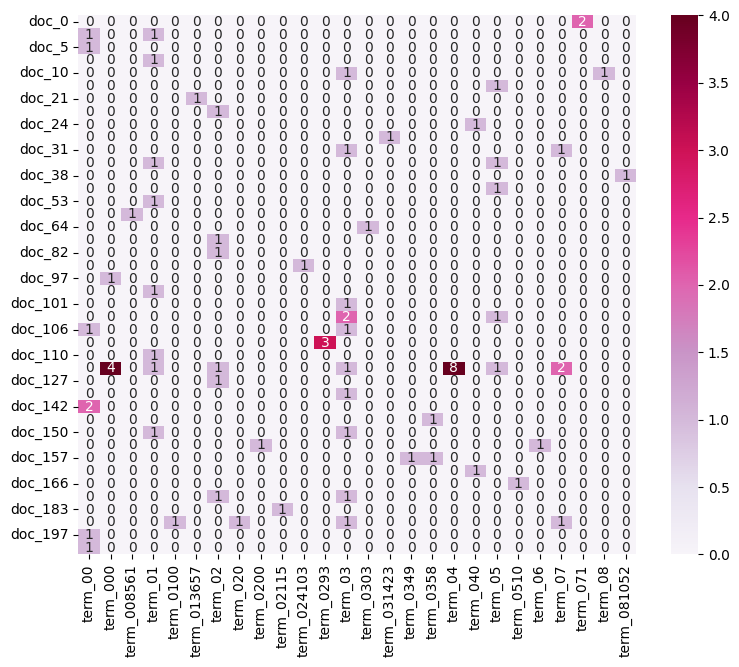

In [18]:
import seaborn as sns
# Answer here
# Filter out the columns and rows that don't have any occurences

plot_z = X_counts[0:200, 0:200].toarray() #X_counts[how many documents, how many terms]
non_zero_rows, non_zero_cols = np.nonzero(plot_z)
non_zero_cols = np.unique(non_zero_cols)
non_zero_rows = np.unique(non_zero_rows)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:200]]

selected_x = [plot_x[col] for col in non_zero_cols]
selected_y = [plot_y[row] for row in non_zero_rows]
selected_z = plot_z[non_zero_rows][:, non_zero_cols]
df_todraw = pd.DataFrame(selected_z, columns = selected_x, index = selected_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

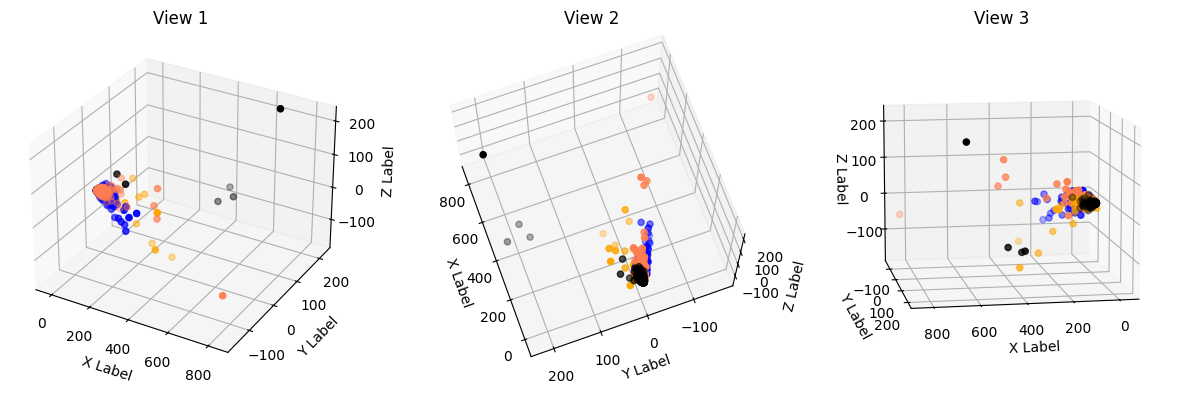

In [19]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

col = ['coral', 'blue', 'black', 'orange']

# Create a 3D plot with three different camera angles
fig = plt.figure(figsize=(15, 5))

# First subplot
ax1 = fig.add_subplot(131, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c=c, marker='o')
ax1.set_title('View 1')
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

# Second subplot
ax2 = fig.add_subplot(132, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs, c=c, marker='o')
ax2.view_init(elev=70, azim=160)  # Adjust the view angle
ax2.set_title('View 2')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

# Third subplot
ax3 = fig.add_subplot(133, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs, c=c, marker='o')
ax3.view_init(elev=10, azim=80)  # Adjust the view angle
ax3.set_title('View 3')
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [20]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

35788


In [21]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [22]:
# Answer here
import plotly.express as px
import pandas as pd


data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}
df = pd.DataFrame(data)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [23]:
# Answer here
display_size = int(input())
data = {'Terms': count_vect.get_feature_names_out()[:display_size], 'Term Frequencies': term_frequencies[:display_size]}
df = pd.DataFrame(data)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [24]:
# Answer here
data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}
df = pd.DataFrame(data)

# Sort the data in descending order of term frequencies
df = df.sort_values(by='Term Frequencies', ascending=False)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [25]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


---

# Part 2

### 1. Data Preparation

In [26]:
input_data = ''
data_root = './sentiment labelled sentences/'
data_name = [
    'amazon_cells_labelled.txt',
    'imdb_labelled.txt',
    'yelp_labelled.txt'
]
for name in data_name:
    with open(data_root + name, 'r') as f:
        input_data += f.read()

In [27]:
len(input_data)

204813

In [28]:
input_data

'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Excellent value.\t1\nGreat for the jawbone.\t1\nTied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\nThe mic is great.\t1\nI have to jiggle the plug to get it to line up right to get decent volume.\t0\nIf you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nIf you are Razr owner...you must have this!\t1\nNeedless to say, I wasted my money.\t0\nWhat a waste of money and time!.\t0\nAnd the sound quality is great.\t1\nHe was very impressed when going from the original battery to the extended battery.\t1\nIf the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\nVery good quality though\t1\nThe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nHighly recommend for any one who has a blue tooth phone.\t1\nI advise EVERYON

### 2. Data Transformation

In [29]:
import pandas as pd

# split text and label 
texts, labels = dmh.format_record(input_data)
X = pd.DataFrame(texts, columns=['text'])

In [30]:
X[:5]

,text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


In [31]:
X['label'] = labels
X[:5]

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### 3. Data Mining with Pandas

#### 3.1 Check missing value

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


No missing value found, so no need to do anything.

#### 3.2 Deal with duplicate data

In [33]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [34]:
sum(X.duplicated())

17

There are duplicate comments in the data.

In [35]:
X[X.duplicated() == True]

,text,label
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


Remove them, I preserve a copy in the data here.

In [36]:
print("Before dropping duplicate: ", len(X))
X.drop_duplicates(keep="first", inplace=True)
print("After dropping duplicate: ", len(X))

Before dropping duplicate:  3000
After dropping duplicate:  2983


### 4. Data Preprocessing

#### 4.1 Sampling

In [37]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

,text,label
2423,We've tried to like this place but after 10+ t...,0
1558,The script is a big flawed mess.,0
889,It was that loud.Glad to say that the Plantron...,1
332,The reception is excellent!,1
1850,Now imagine that every single one of those dec...,0
...,...,...
926,It looses connection to the phone even when it...,0
1221,There are the usual Hitchcock logic flaws.,0
2724,Awesome selection of beer.,1
2470,"Very good, though!",1


#### 4.2 Feature Creation

In [38]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zijun0502\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [39]:
X[0:4]

,text,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [40]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### 4.3 Feature Subset Selection

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [42]:
count_vect.get_feature_names_out()[4000]

'settings'

In [43]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [44]:
analyze(" ".join(list(X[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [45]:
X_counts.shape

(2983, 5155)

In [46]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [47]:
X_counts[500:505, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [48]:
print(X_counts[501,0:100] == 1)

  (0, 73)	True


In [49]:
count_vect.get_feature_names_out()[73]

'able'

In [50]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [51]:
plot_z = X_counts[550:570, 200:220].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


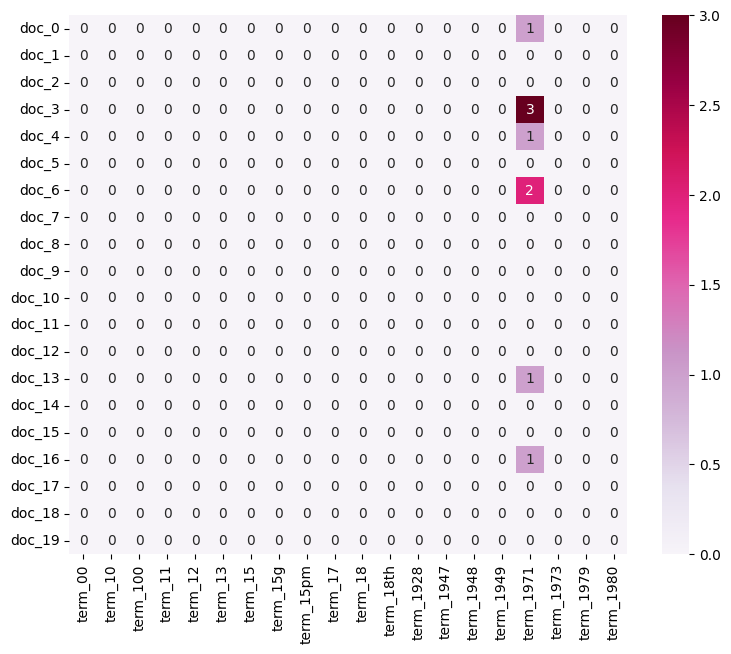

In [52]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

,term_10,term_13,term_15,term_15g,term_2mp,term_350,term_375,term_45,term_510,term_680,...,term_actually,term_advertised,term_advise,term_after,term_again,term_all,term_almost,term_also,term_although,term_am
doc_3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
doc_21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_38,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
doc_40,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


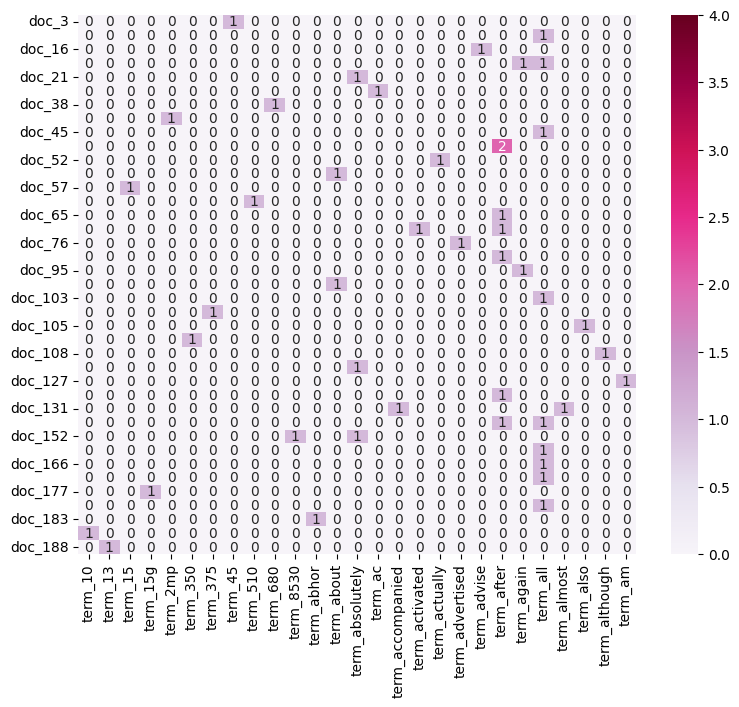

In [53]:
# Answer here
# Filter out the columns and rows that don't have any occurences

plot_z = X_counts[0:200, 0:200].toarray() #X_counts[how many documents, how many terms]
non_zero_rows, non_zero_cols = np.nonzero(plot_z)
non_zero_cols = np.unique(non_zero_cols)
non_zero_rows = np.unique(non_zero_rows)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:200]]

selected_x = [plot_x[col] for col in non_zero_cols]
selected_y = [plot_y[row] for row in non_zero_rows]
selected_z = plot_z[non_zero_rows][:, non_zero_cols]
df_todraw = pd.DataFrame(selected_z, columns = selected_x, index = selected_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

#### 4.4 Dimensionality Reduction

In [54]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5155)
(2983, 2)


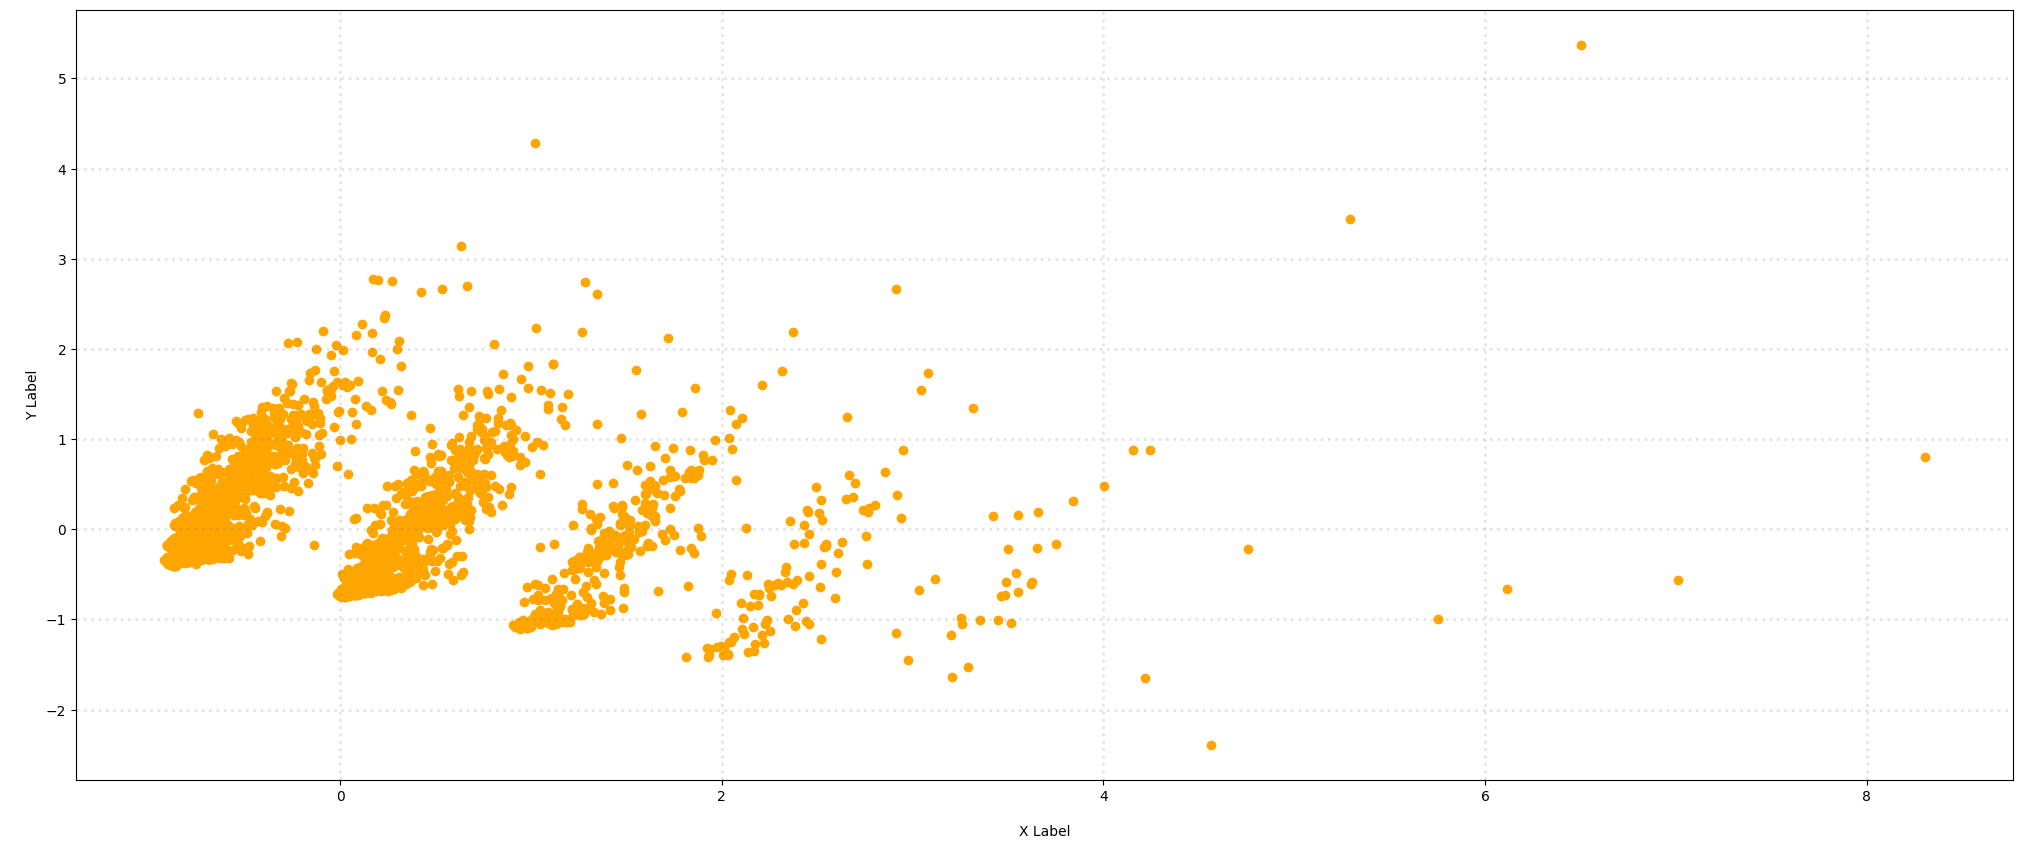

In [55]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

xs = X_reduced.T[0]
ys = X_reduced.T[1]
   
ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

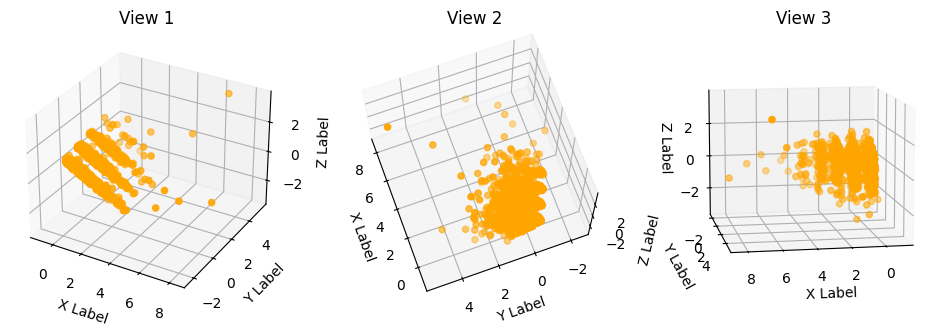

In [56]:
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]

ax1.scatter(xs, ys, zs, c=c, marker='o')

ax1.set_title('View 1')
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

ax2 = fig.add_subplot(132, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]

ax2.scatter(xs, ys, zs, c=c, marker='o')
ax2.view_init(elev=70, azim=160)  # Adjust the view angle

ax2.set_title('View 2')
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

ax3 = fig.add_subplot(133, projection='3d')

xs = X_reduced_3d[:, 0]
ys = X_reduced_3d[:, 1]
zs = X_reduced_3d[:, 2]

ax3.scatter(xs, ys, zs, c=c, marker='o')
ax3.view_init(elev=10, azim=80)  # Adjust the view angle

ax3.set_title('View 3')
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')

plt.show()


#### 4.5 Attribute Transformation / Aggregation

In [57]:
term_frequencies = []
print(X_counts.shape)
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

(2983, 5155)


In [58]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[1000]

2

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\3140323867.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


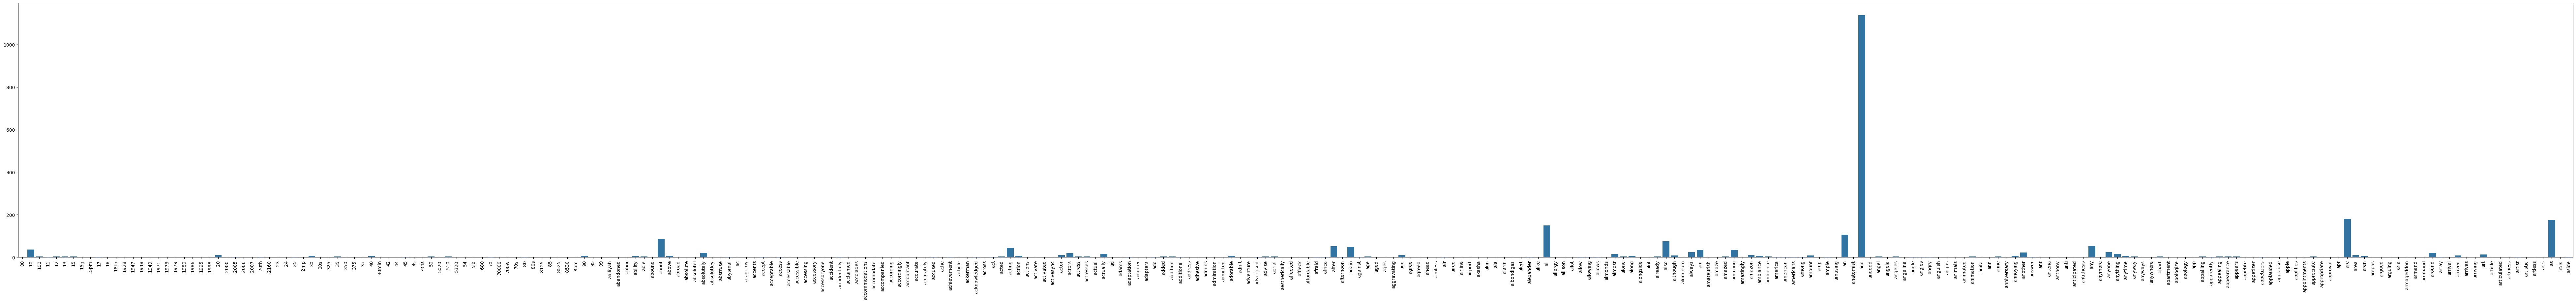

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [60]:
# Answer here
import plotly.express as px
import pandas as pd

display_size = int(input("The size of data to display"))
data = {'Terms': count_vect.get_feature_names_out()[:display_size], 'Term Frequencies': term_frequencies[:display_size]}
df = pd.DataFrame(data)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

In [61]:
# Answer here
data = {'Terms': count_vect.get_feature_names_out()[:300], 'Term Frequencies': term_frequencies[:300]}
df = pd.DataFrame(data)

# Sort the data in descending order of term frequencies
df = df.sort_values(by='Term Frequencies', ascending=False)

fig = px.bar(df, x='Terms', y='Term Frequencies', labels={'Term Frequencies': 'Term Frequencies'})
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility

fig.show()

In [62]:
print(df)

          Terms  Term Frequencies
216         and              1138
273         are               180
297          as               175
179         all               149
214          an               106
..          ...               ...
119    activate                 1
120   activated                 1
121  activesync                 1
126      actual                 1
150     affleck                 1

[300 rows x 2 columns]


C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\1525322602.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


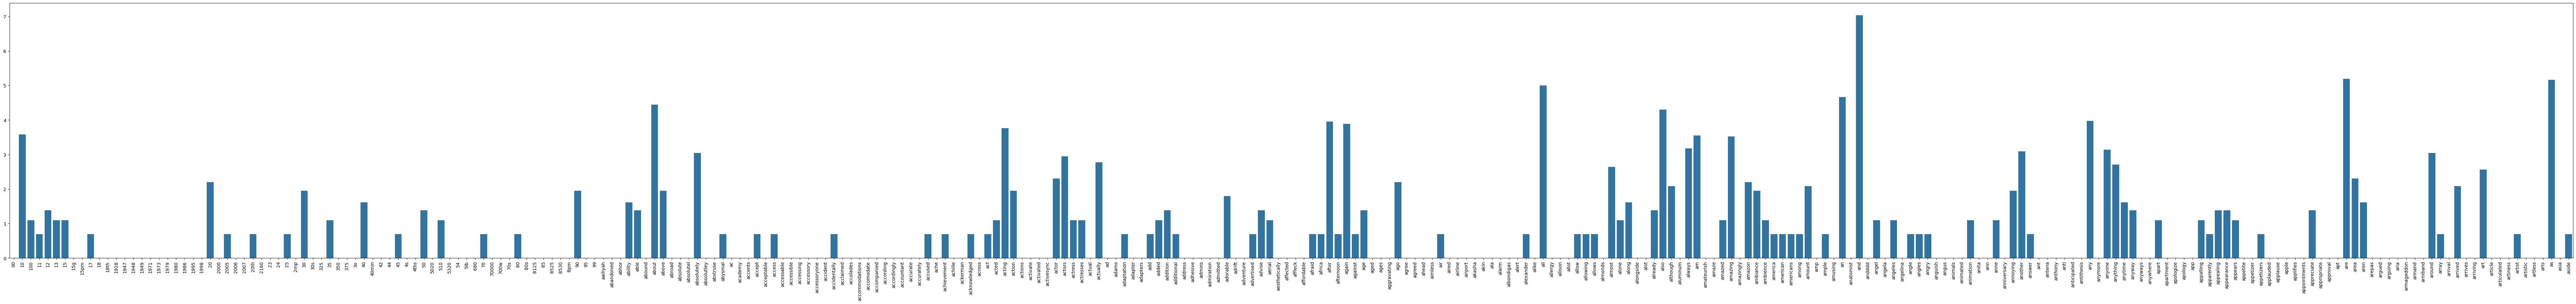

In [63]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

#### 4.6 Discretization and Binarization

In [64]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.text)

LabelBinarizer()

In [65]:
X['bin_text'] = mlb.transform(X['text']).tolist()
X[0:9]

,text,label,unigrams,bin_text
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The mic is great.,1,"[The, mic, is, great, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### 5. Data Exploration

In [66]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[100]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[200]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[300]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [67]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Integrated seamlessly with the Motorola RAZR phone.']
['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Now I know that I made a wise decision.']


In [68]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.178174
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zijun0502\AppData\Local\Temp\ipykernel_18988\452772485.py:17: DeprecationWarning:

Conversion of an array wit

# Part 3

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).




## 3.1 Visualizations

First, read data and convert it into a pandas DataFrame to facilitate subsequent tasks.

In [98]:
input_data = ''
data_root = './sentiment labelled sentences/'
data_name = [
    'amazon_cells_labelled.txt',
    'imdb_labelled.txt',
    'yelp_labelled.txt'
]
data = [[],[],[]]
col = ['text', 'label', 'source']
for name in data_name:
    source = name.split('_')[0]
    with open(data_root + name, 'r') as f:
        texts, labels = dmh.format_record(f.read())
    data[0] += texts
    data[1] += labels
    data[2] += [source for _ in range(len(texts))]
X = pd.DataFrame()
X['text'] = data[0]
X['label'] = data[1]
X['source'] = data[2]
X


,text,label,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


### 3.1.1 Sentiment Distribution by Source

In [107]:
sentiment_distribution = X.groupby(['source', 'label']).size().unstack('label')
sentiment_distribution

label,0,1
source,,
amazon,500,500
imdb,500,500
yelp,500,500


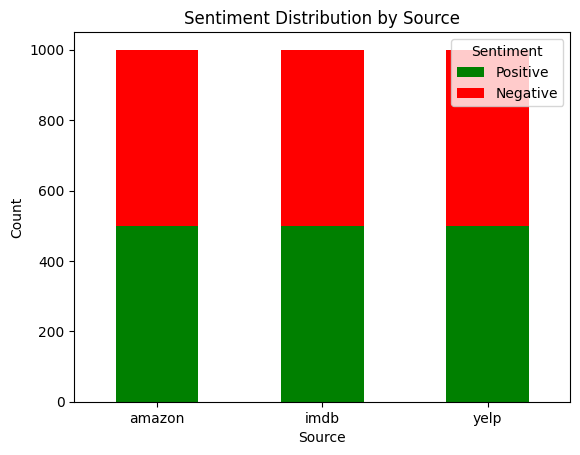

In [109]:
# Plot sentiment distribution as a histogram
colors = ['green', 'red']
sentiment_distribution.plot(kind='bar', stacked=True, color = colors)
plt.title('Sentiment Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()


We can see that the number of positive and negative comment are equal in this dataset.

### 3.1.2 Wordcloud

A wordcloud serves as a valuable visual representation, enabling us to gain insights into the most frequently used words within a dataset.

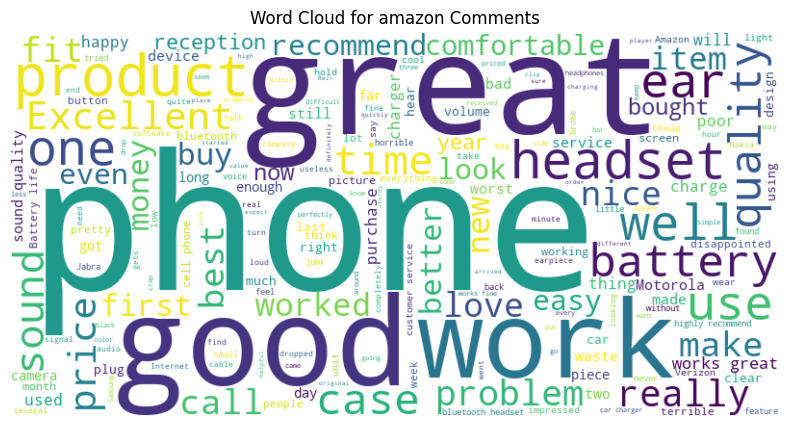

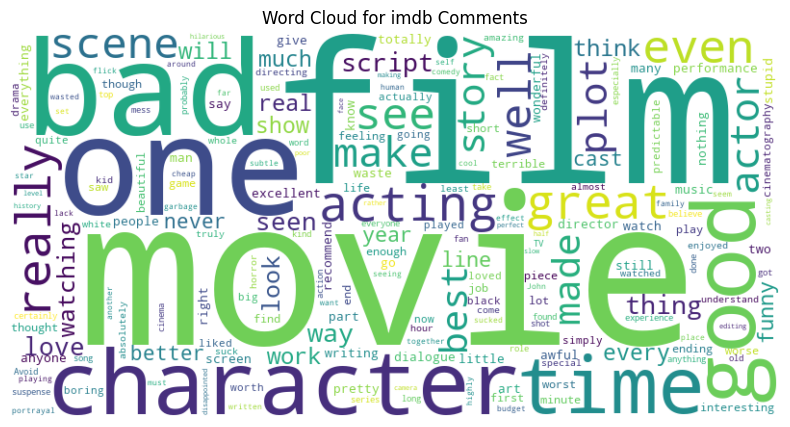

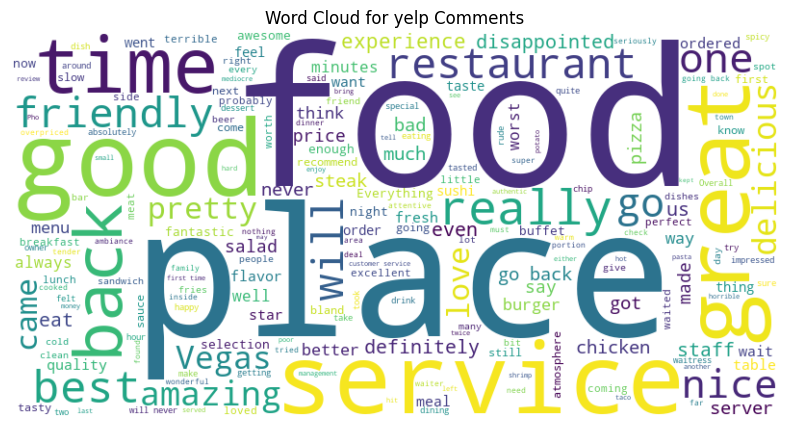

In [113]:
from wordcloud import WordCloud


# Create a dictionary to store comments for each source
comments = {'amazon': [], 'imdb': [], 'yelp': []}

# Loop through the DataFrame and extract comments by source
for source in comments:
    source_comments = X[X['source'] == source]['text'].tolist()
    comments[source].extend(source_comments)

# Generate word clouds for each source
for source in comments:
    comment_text = ' '.join(comments[source])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

    # Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {source} Comments')
    plt.axis('off')
    plt.show()


Upon segregating the positive and negative comments and generating separate word clouds for each group, we obtain the following visual representations:

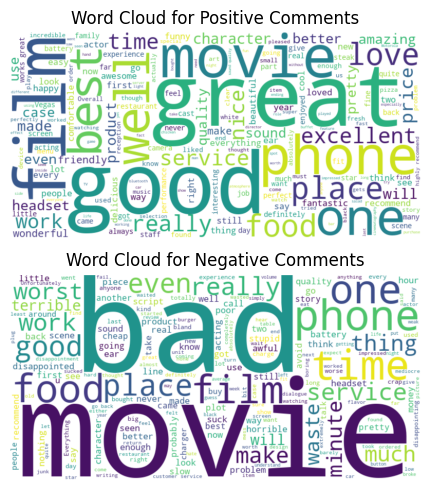

In [122]:
# Separate positive and negative comments
positive_comments = X[X['label'] == '1']['text'].tolist()
negative_comments = X[X['label'] == '0']['text'].tolist()
# Generate word clouds for positive comments
positive_text = ' '.join(positive_comments)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word clouds for negative comments
negative_text = ' '.join(negative_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the Word Clouds for positive and negative comments
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Comments')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Comments')
plt.axis('off')

plt.tight_layout()
plt.show()


### 3.1.2 Histogram of Review Lengths

In [87]:
import matplotlib.pyplot as plt

# Lists to store review lengths for positive and negative reviews
positive_review_lengths = []
negative_review_lengths = []

# Loop through the data files
for name in data_name:
    source = name.split('_')[0]  # Extract the source name from the filename
    with open(data_root + name, 'r') as f:
        docs = f.read()
        texts, labels = dmh.format_record(docs)
        
        for text, label in zip(texts, labels):
            # Calculate the length of the review
            review_length = len(text.split())
            
            # Categorize review length by sentiment
            if label == 1:
                positive_review_lengths.append(review_length)
            else:
                negative_review_lengths.append(review_length)

# Create histograms for positive and negative review lengths
plt.figure(figsize=(10, 6))
plt.hist(positive_review_lengths, bins=30, alpha=0.5, label='Positive', color='green')
plt.hist(negative_review_lengths, bins=30, alpha=0.5, label='Negative', color='red')
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


ZeroDivisionError: division by zero

# Part 4

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__